# Solving Conductive Heat Transfer: Case of a window, with and without an insulating aire layer

Jakub Kwaśniak

Jakub Domański

Mehmet Emre Durmus

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In this training we wish to solve the 1D  conductive heat transfer problem. We will consider heat transfer in a 1D slab of material It could be a glass window for example.. The medium has a width L and a thermal conductivity K and a specific heat Cp and density $\rho$. 



The 1D heat diffusion equations reads :
    $\frac{\partial T}{\partial t}-\frac{K}{\rho Cp}\frac{\partial^2 T}{\partial x^2}=\frac{SK}{\rho Cp}$

where S is an energy source term (in $w/m^2$) that is non-zero if we inject energy in the system. For the moment we will assume that S=0

For glass, $K\simeq 1 w/m/K$, Cp=753 J/Kg/K, $\rho=2500 Kg/m^3$

## Diffusion timescale and the Courant condition (CFL)

We assume initially that the glass width is L =1 cm, and that the temperature everywhere is 300K initially. The right (x=0) and left (x=L) temperatures of the glass is $T_L$ and $T_R$. We will change the glass left and right temperatures and see how the temperature profile (T(x) for x ranging from 0 to L) evolves.

By doing a simple dimensional analysis, find a characteristic timescale $T_d$ using L (the width of the window),  $T_d$ as a functio of L, K, $\rho$ $Cp$. $T_d$ is the diffusion timescale. We can also recognize that $D=K/\rho C_p$ is a diffusion coefficient, so the classical theory for diffusion processes applies here... 

Using dimensional analysis on the partial differential equation

$$ \partial_t - D \partial_x^2 T = 0$$
$$ \frac{T}{T_d} - D \frac{T}{L^2} = 0$$
$$ \frac{T}{T_d} = D \frac{T}{L^2} $$
$$ T_d = \frac{L^2}{D}.$$

We can check the units of $T_d$ by noting that the units of the diffusion coefficient are m$^2$/s.
$$T_d = \frac{L^2}{D}
= \frac{C_p \cdot \rho \cdot L^2}{K} \sim \frac{\frac{\text{J}}{\text{kg} \cdot \text{K}} \cdot \frac{\text{kg}}{\text{m}^3} \cdot \text{m}^2}{\frac{\text{W}}{\text{m} \cdot \text{K}}}
= \frac{\frac{\text{J}}{\text{m}}}{\frac{\text{J}}{\text{s} \cdot \text{m}}} = s,$$
as expected for a characteristic timescale.

## Discretization of the problem

Now we want to solve the diffusion equation using a finite difference method.
We need first to write the integration scheme.
we call $x_i=i*dx$, $t_j=j*dt$ with i,j, integers, and dt and dx standing for the timestep and space step respectively. Let's call $T_i^j$ the numerical approximation to $T(x_i,t_j)$

We start soing first order in time and second order in space. 
For the time derive use a forward 1st order derivative. Give the 1st order forward approximation.

$$ \frac{\partial T}{\partial t} = \frac{T^{j+1}_i - T^{j}_i}{\text{d}t} + o(\text{d}t) $$

For the temperature space derivative we need the second order derivative. As diffusion ois a process acting in both directions simultaneously we can use a centered scheme. Provide a 1st order cetered approximation to the second order derivative : You can have a look here : https://en.wikipedia.org/wiki/Finite_difference

$$ \frac{\partial^2 T}{\partial x^2} = \frac{T^j_{i+1} - 2 T^j_{i} + T^j_{i-1}}{\text{d}x^2} + o(\text{d}x^2)$$

From the above two expressions, build an integration scheme for the Heat diffusion equation :

$$\begin{align*}
\frac{\partial T}{\partial t} - D \frac{\partial^2 T}{\partial x^2} &= 0, \quad D = \frac{K}{\rho C_p} \\\\
\therefore{} \frac{T^{j+1}_i - T^{j}_i}{\text{d}t} &= D \frac{T^j_{i+1} - 2 T^j_{i} + T^j_{i-1}}{\text{d}x^2} \\\\
\therefore{} T^{j+1}_i &= T^j_i - \underbrace{\frac{D\; \text{d}t}{\text{d}x^2}}_{\sigma} (T^j_{i+1} - 2 T^j_{i} + T^j_{i-1})
\end{align*}$$
Introduce $\sigma\equiv D \frac{dt}{dx^2}$, such that
$$ T_i^{j+1} = T_i^j(1-2\sigma) + \sigma(T_{i-1}^j + T_{i+1}^j)$$

We will discretise space by using N=50 cells. What is the time necessary, $T_{cell}$ for heat to diffuse over a cell ??  
 

$$T_{d}= \frac{L^2}{D} \approx 188.25 \text{ s}$$
$$ T_{\text{cell}} = \frac{T_d}{N} = 3.765 \text{ s}$$

## Numerically solving heat transfer accross the window

We will make sure, in the following to choose dt < $T_{cell}$. This will be our "CFL" condition in the diffusion case.


As boundary conditions, we will put $T_1^0=T_L$ and $T_N^0=T_R$, with $T_R=300K$ (warm interior) and $T_L=273K$ (freezing cold outside!).

The initial state is $T^0_{2..N-1}=300K$

integrate the evolution of the temperature from t=0 to $t_{end} = 10 T_d$


Write the code that compute the Evolution of the temperature profile. You have to 

*1) Define the X axis, dt, dx, the different constant, TR, TL

*2) Initialise T

*3) Do a loop over time. 

*4)      Compute dT/dt for each space bin i

*5)      Update T for each space bin i 

*6)     Update time

*7)     end of loop








In [2]:
# Define constants
K_g = 1 #w/m/K
Cp_g = 753 #J/Kg/K
rho_g = 2500 #Kg/m^3
L = 1e-2 #m
T_l = 273 #K
T_r = 300 #K

D_g = K_g / (rho_g * Cp_g)
print(f'D_g = {D_g:.2e} m^2/s')

t_d_g = L**2 / D_g 
print(f't_d_g = {t_d_g:.2f} s')

Nx = 50
t_c_g = t_d_g / Nx
print(f't_cell = {t_c_g:.2f} s')

dt = 2e-2
print(f'dt = {dt:.2e} s')

t_end = 10 * t_d_g
t_arr = np.arange(0, t_end, dt)
Nt = len(t_arr)

dx = L / Nx
x_arr = np.arange(0, L, dx)

sigma_g = dt * D_g / dx**2
print(f'sigma_g = {sigma_g:.2f}')

D_g = 5.31e-07 m^2/s
t_d_g = 188.25 s
t_cell = 3.77 s
dt = 2.00e-02 s
sigma_g = 0.27


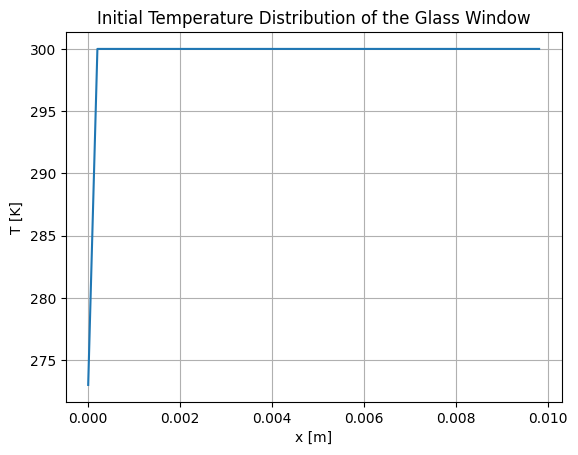

In [3]:
T_0 = np.full(Nx, T_r)
T_0[0], T_0[-1] = T_l, T_r

plt.plot(x_arr, T_0)
plt.xlabel('x [m]')
plt.ylabel('T [K]')
plt.title('Initial Temperature Distribution of the Glass Window')
plt.grid()
plt.show()

In [4]:
diag_1 = np.diag(np.full(Nx-1, sigma_g), k=1) # above the diagonal, sigma * T(j, i+1) terms
diag_2 = np.diag(np.full(Nx, 1 - 2*sigma_g), k=0) # diagonal, (1 - 2*sigma) T(j, i) terms
diag_3 = np.diag(np.full(Nx-1, sigma_g), k=-1) # below the diagonal, sigma * T(j, i-1) terms

M1 = diag_1 + diag_2 + diag_3 # full matrix, T(j+1, i) = (1 - 2*sigma) T(j, i) + sigma*(T(j, i+1) + T(j, i-1))

In [5]:
def evolve(T_0: np.ndarray, M: np.ndarray) -> np.ndarray:
    """Function performing matrix multipilcation to evolve the temperature vector in time."""
    T_arr = np.empty((Nt+1, Nx))
    T_arr[0] = T_0
    T = T_arr[0] # current temperature profile

    for i in range(1, Nt+1):
        T = np.dot(M, T) # T(j+1) =  M*T(j)
        T[0], T[-1] = T_l, T_r # boundary condition
        T_arr[i] = T # append the results

    return T_arr

def make_plot(x_arr: np.ndarray, t_arr: np.ndarray, T_arr: np.ndarray, point_reduction=1, t_max=Nt, insulated=False, title=''):
    """Function plotting the temperature profile as a function of space and a heat map illustrating the transport of heat."""
    fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(12.8, 4.8))
    
    t_arr = t_arr[:int(t_max):int(point_reduction)]
    T_arr = T_arr[:int(t_max):int(point_reduction)]

    for n in np.linspace(0, len(t_arr)-1, 11): # different times
        n = int(n)
        ax1.plot(x_arr, T_arr[n], label=rf'$t = {t_arr[n]:.2f}$')
    
    ax1.set_xlabel('x [m]')
    ax1.set_ylabel('T [K]')
    ax1.grid()

    f2 = ax2.pcolormesh(x_arr, t_arr, T_arr, shading='nearest')
    ax2.set_xlabel('x [m]')
    ax2.set_ylabel('t [s]')

    if insulated:
            ax1.axvline(3e-3, c='k', ls='--')
            ax1.axvline(7e-3, c='k', ls='--')
            ax2.axvline(3e-3, c='k', ls='--')
            ax2.axvline(7e-3, c='k', ls='--')
   
    fig.colorbar(f2, ax=ax2,label='T [K]')
    ax1.legend()
    fig.suptitle(title)
    plt.show()

DO : Provide 5 or 6 plots from 0 to $t_{end}$ display how heat is transfered

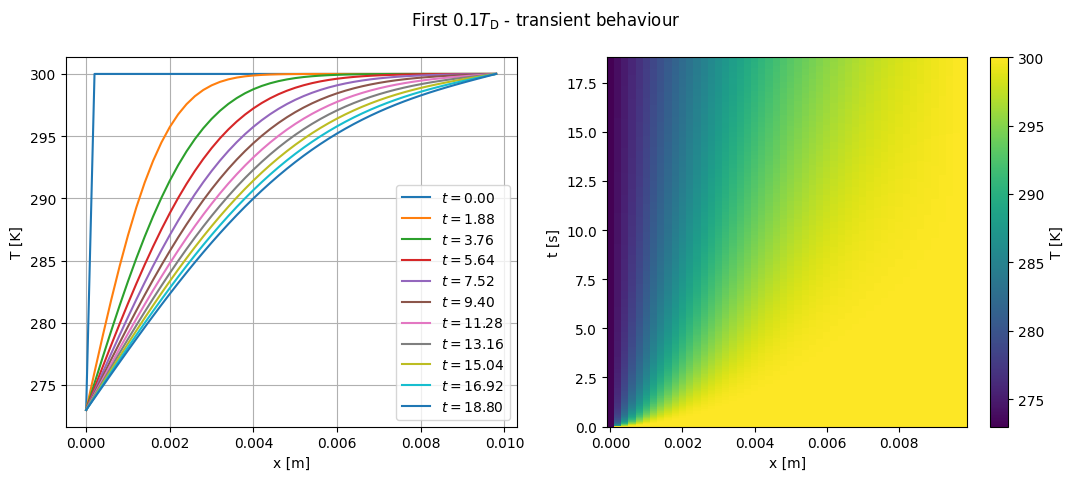

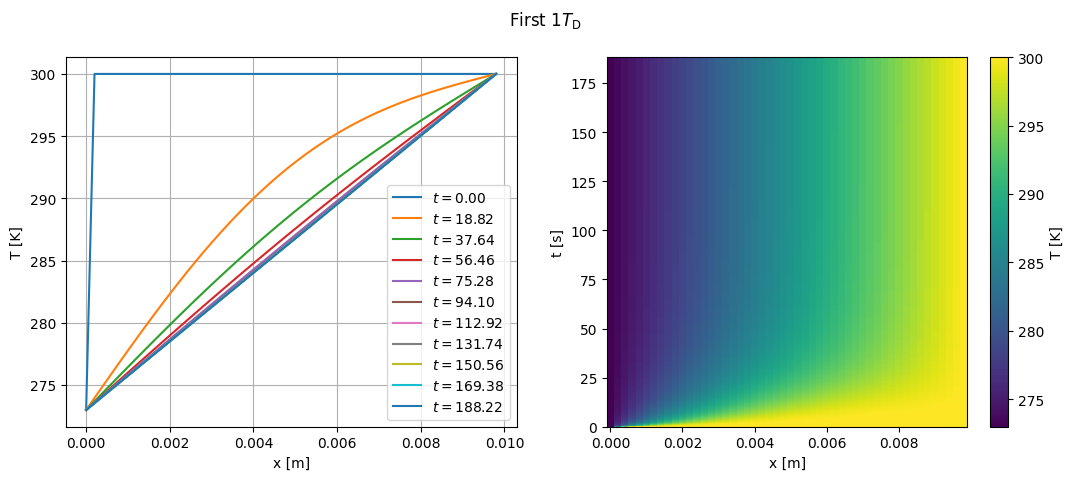

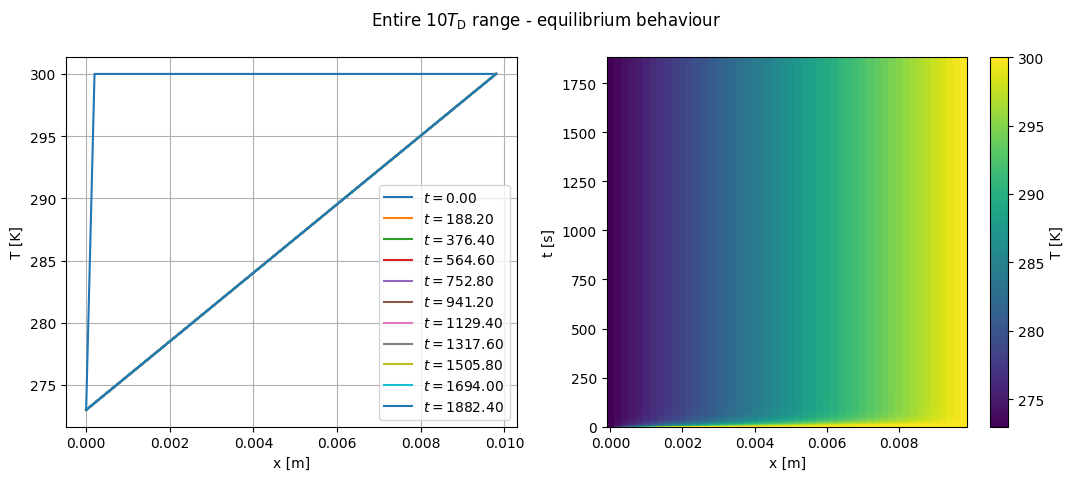

In [6]:
T_arr = evolve(T_0, M1)

make_plot(x_arr, t_arr, T_arr, t_max=Nt/100, title=r'First $0.1 T_{\text{D}}$ - transient behaviour')
make_plot(x_arr, t_arr, T_arr, t_max=Nt/10, title=r'First $1 T_{\text{D}}$')
make_plot(x_arr, t_arr, T_arr, point_reduction=10, t_max=Nt, title=r'Entire $10 T_{\text{D}}$ range - equilibrium behaviour')

DO : show that at equilibrium the thermal gradient is constant.

In [7]:
# Take the last time entry as equilibrium -> we assumed we let the system evolve for long enough time
# Calculate the spatial derviative at each point
dT = np.array([])
for idx in range(1, len(T_arr[-1])):
    dT = np.append(dT, (T_arr[-1][idx] - T_arr[-1][idx-1])/dx)

print(f"Thermal gradient is (approximately) constant at each point: {dT} [K/m]")

Thermal gradient is (approximately) constant at each point: [2755.10204083 2755.10204083 2755.10204083 2755.10204083 2755.10204083
 2755.10204083 2755.10204083 2755.10204083 2755.10204083 2755.10204082
 2755.10204082 2755.10204082 2755.10204082 2755.10204082 2755.10204082
 2755.10204082 2755.10204082 2755.10204082 2755.10204082 2755.10204082
 2755.10204082 2755.10204082 2755.10204082 2755.10204082 2755.10204082
 2755.10204082 2755.10204082 2755.10204081 2755.10204081 2755.10204081
 2755.10204081 2755.10204081 2755.10204081 2755.10204081 2755.10204081
 2755.10204081 2755.10204081 2755.10204081 2755.10204081 2755.10204081
 2755.10204081 2755.10204081 2755.10204081 2755.10204081 2755.1020408
 2755.1020408  2755.1020408  2755.1020408  2755.1020408 ] [K/m]


## Heat flux toward the exterior : energy loss 

At equilibrium what is the heat flux ? $F=-K\frac{\partial T}{\partial x}$, with K standing for the diffusion coefficient 

Since K=1 we have $F=-\partial_x T$. We know that the thermal gradient is about $2755 K/m$ at the last time step so $F\approx -2755 \text{ W/m}^2$, which is in accordance with the typical values for natural convection.

## Inserting an insulating air-layer

Now we put an insulating layer with air. So our window is like a "sandwich", with 0.3 mm of glass, 0.4 mm of air, 0.3 mm of glass.  Air characteristics are at 273K :
K=0.025 W/m/K , Cp=1005 J/K/Kg, and $\rho= 1.30 Kg/m^3$.

Redo the same exercice as above :

Write the new code (BEWARE : now K, RHO, Cp are not the same evrywhere!!!!)

In [8]:
K_a = 0.025
Cp_a = 1005
rho_a = 1.3

D_a = K_a / (rho_a * Cp_a)
print(f'D_g = {D_g:.2e} m^2/s')
print(f'D_a = {D_a:.2e} m^2/s \n')

dt = 1e-3
t_arr = np.arange(0, t_end, dt)
print(f'dt = {dt:.2e} s \n')

Nt = len(t_arr)

sigma_g = dt * D_g / dx**2
sigma_a = dt * D_a / dx**2
print(f'sigma_g = {sigma_g:.2f}')
print(f'sigma_a = {sigma_a:.2f}')

D_g = 5.31e-07 m^2/s
D_a = 1.91e-05 m^2/s 

dt = 1.00e-03 s 

sigma_g = 0.01
sigma_a = 0.48


In [9]:
def get_sigma(x: float) -> float:
    """Function calculating the value of the Courant number, depending on the parameter values."""
    if x >= 0.3e-2 and x < 0.7e-2:
        return sigma_a
    else:
        return sigma_g

row = np.zeros(Nx)
row[0], row[1] = 1 - 2 * sigma_g, sigma_g
M2 = row

for i in range(1, Nx-1): # T(j+1, i) = (1 - 2*sigma) T(j, i) + sigma*(T(j, i+1) + T(j, i-1))
    x = i*dx
    row = np.zeros(Nx)
    row[i] = 1 - 2 * get_sigma(x)
    row[i-1], row[i+1] = get_sigma(x), get_sigma(x)
    M2 = np.vstack((M2, row))

row = np.zeros(Nx)
row[-2], row[-1] = 1 - 2 * sigma_g, sigma_g
M2 = np.vstack((M2, row))

What is the effect of the insulating layer ? Show with plots 

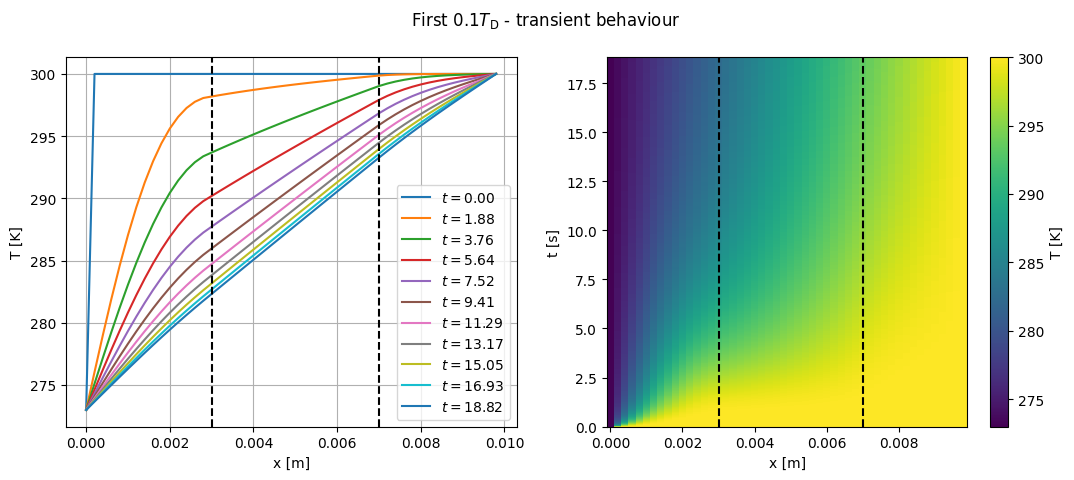

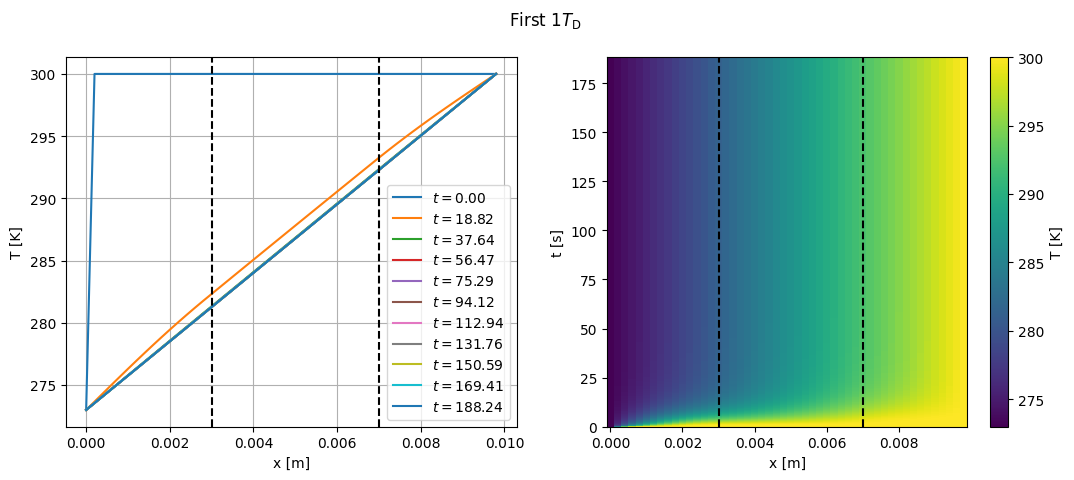

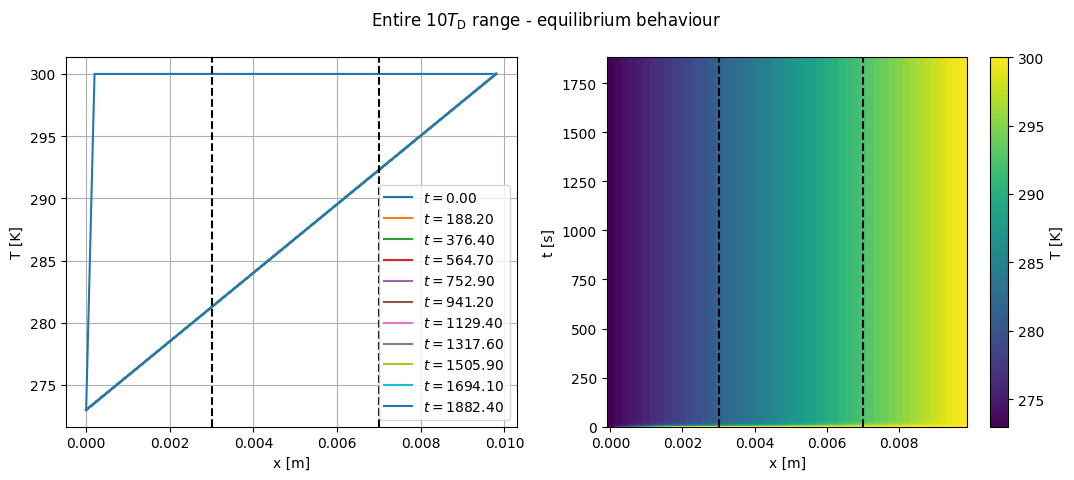

In [10]:
T_ins_arr = evolve(T_0, M2)

make_plot(x_arr, t_arr, T_ins_arr, point_reduction=1e1, t_max=Nt/100, insulated=True, title=r'First $0.1 T_{\text{D}}$ - transient behaviour')
make_plot(x_arr, t_arr, T_ins_arr, point_reduction=1e1, t_max=Nt/10, insulated=True, title=r'First $1 T_{\text{D}}$')
make_plot(x_arr, t_arr, T_ins_arr, point_reduction=1e2, t_max=Nt, insulated=True, title=r'Entire $10 T_{\text{D}}$ range - equilibrium behaviour')

Where the dashed lines indicate the boundaries between the glass and air regions. From the plots above, we can see that the effect of the insulating layer is to slow down heat transfer between the two glass interfaces, which is reflected by the gradient of the temperature function being lower in the region divided by the dashed lines. However, at equilibrium the temperature distribution remains the same.

What is the Thermal profile in the thickness of the window ?


The thermal profile is illustrated in the figure above - Temperature as a function of distance along the material.

What is the final heat flux ?

Conclusion ? What is the interest of the insulating layer ?


In [11]:
# Get the gradient
grad = np.array([])
for idx in range(1, len(T_ins_arr[-1])):
    grad = np.append(grad, (T_ins_arr[-1][idx] - T_ins_arr[-1][idx-1])/dx)
    
print(f"Thermal gradient is constant at each point: {dT} [K/m]")

Thermal gradient is constant at each point: [2755.10204083 2755.10204083 2755.10204083 2755.10204083 2755.10204083
 2755.10204083 2755.10204083 2755.10204083 2755.10204083 2755.10204082
 2755.10204082 2755.10204082 2755.10204082 2755.10204082 2755.10204082
 2755.10204082 2755.10204082 2755.10204082 2755.10204082 2755.10204082
 2755.10204082 2755.10204082 2755.10204082 2755.10204082 2755.10204082
 2755.10204082 2755.10204082 2755.10204081 2755.10204081 2755.10204081
 2755.10204081 2755.10204081 2755.10204081 2755.10204081 2755.10204081
 2755.10204081 2755.10204081 2755.10204081 2755.10204081 2755.10204081
 2755.10204081 2755.10204081 2755.10204081 2755.10204081 2755.1020408
 2755.1020408  2755.1020408  2755.1020408  2755.1020408 ] [K/m]


The heat flux now depends on the interface we are considering since the value of thermal conductivity is different for the two regions:
$$F_{\text{glass}} \approx -2755 \text{W/m}^2,$$
$$F_{\text{air}} \approx 0.025 \cdot (-2755) = -68.875 \text{W/m}^2.$$
The absolute value of the heat flux is significantly smaller in air, meaning that it acts as a good insulator, resisting the transfer of heat. Including the insulating layer betweent the two glass interfaces allows for studying the function of temperature along the glass in a more realistic setting. In reality, there is always some air present in a material. Therefore, even though it is computationally taxing, it is of interest to include such insulating layers in realistic models. 